<a href="https://colab.research.google.com/github/MulugetaNigus/SCRATCH_SCRIPT_GAME_DEV/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding, Flatten

In [5]:
import numpy as np
import pandas as pd

In [6]:
train_ds = pd.read_csv('/content/drive/MyDrive/sentiment_train_dataset.csv',encoding='latin1');
validation_ds = pd.read_csv('/content/drive/MyDrive/sentiment_test_dataset.csv',encoding='latin1');

In [7]:
train_ds = train_ds[['text','sentiment']]
validation_ds = validation_ds[['text','sentiment']]

In [8]:
train_ds['text'].fillna('',inplace=True)
validation_ds['text'].fillna('',inplace=True)

<ipython-input-8-cb58bb3e5260>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_ds['text'].fillna('',inplace=True)
<ipython-input-8-cb58bb3e5260>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ds['text'].fillna('',inplace=True)
<ipython-input-8-cb58bb3e5260>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame o

In [9]:
def func(sentiment):
    if sentiment =='positive':
        return 0;
    elif sentiment =='negative':
        return 1;
    else:
        return 2;
train_ds['sentiment'] = train_ds['sentiment'].apply(func)
validation_ds['sentiment'] = validation_ds['sentiment'].apply(func)

In [10]:
x_train = np.array(train_ds['text'].tolist())
y_train = np.array(train_ds['sentiment'].tolist())
x_test = np.array(validation_ds['text'].tolist())
y_test = np.array(validation_ds['sentiment'].tolist())

In [11]:
x_train

array([' I`d have responded, if I were going',
       ' Sooo SAD I will miss you here in San Diego!!!',
       'my boss is bullying me...', ...,
       ' Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend  Take care hun xxxx',
       ' But it was worth it  ****.',
       '   All this flirting going on - The ATG smiles. Yay.  ((hugs))'],
      dtype='<U159')

In [12]:
y_train

array([2, 1, 1, ..., 0, 0, 2])

In [13]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [14]:
y_train

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [15]:
tokenizer = Tokenizer(num_words=20000)

In [16]:
tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

In [17]:
len(tokenizer.word_index)

28614

In [18]:
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [19]:
from keras.utils import pad_sequences
x_train = pad_sequences(x_train, padding='post', maxlen=35)  # Set maxlen to 35
x_test = pad_sequences(x_test, padding='post', maxlen=35)

In [20]:
x_train[0]

array([   1,  162,   19, 7713,   71,    1,  151,   49,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0], dtype=int32)

In [21]:
x_train.shape

(27481, 35)

In [22]:
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=5, input_length=35))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(3,activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.4165 - loss: 1.0703 - val_accuracy: 0.6843 - val_loss: 0.8657
Epoch 2/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.6416 - loss: 0.7947 - val_accuracy: 0.7188 - val_loss: 0.7140
Epoch 3/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7582 - loss: 0.5949 - val_accuracy: 0.7585 - val_loss: 0.6334
Epoch 4/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8211 - loss: 0.4701 - val_accuracy: 0.7637 - val_loss: 0.6006
Epoch 5/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8553 - loss: 0.3918 - val_accuracy: 0.7514 - val_loss: 0.6793
Epoch 6/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8901 - loss: 0.3205 - val_accuracy: 0.7578 - val_loss: 0.6816
Epoch 7/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9098 - loss: 0.2679 - val_accuracy: 0.7421 - val_loss: 0.7462
Epoch 8/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9228 - loss: 0.2331 - val

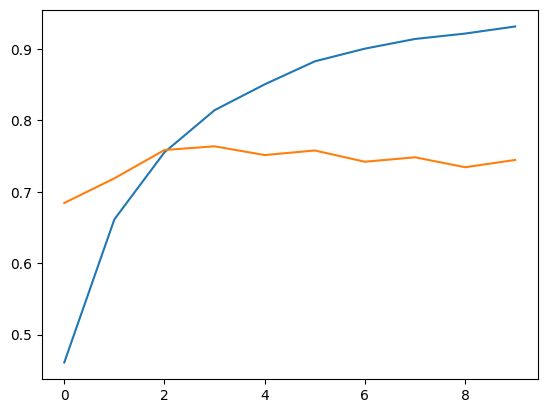

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [1]:
!pip install streamlit==1.29.0

In [26]:
import streamlit as st
text_input = st.text_area("Enter your text here:")

In [27]:
if text_input:
    new_text_seq = tokenizer.texts_to_sequences([text_input])
    new_text_padded = pad_sequences(new_text_seq, padding='post', maxlen=35)
    predictions = model.predict(new_text_padded)
    predicted_class_index = predictions.argmax(axis=-1)

    if predicted_class_index[0] == 0:
        st.write("Sentiment: Positive")
    elif predicted_class_index[0] == 1:
        st.write("Sentiment: Negative")
    else:
        st.write("Sentiment: Neutral")

In [32]:
!streamlit run sentiment_app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: sentiment_app.py


In [ ]:
# Prediction 1
text = "The movie was bad bad bad, i will not recommend this movie to anyone"

new_text_seq = tokenizer.texts_to_sequences([text])
new_text_padded = pad_sequences(new_text_seq, padding='post', maxlen=35)  # Use the max_len determined during training
predictions = model.predict(new_text_padded)
predicted_class_index = predictions.argmax(axis=-1)
if predicted_class_index[0] == 0:
    print("Postive Sentiment");
elif predicted_class_index[0] == 1:
    print("Negative Sentiment")
else:
    print("Neutral Sentiment")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
Negative Sentiment


In [ ]:
# Prediction 2

text = "The movie was good, i will recommend this movie to anyone"

new_text_seq = tokenizer.texts_to_sequences([text])
new_text_padded = pad_sequences(new_text_seq, padding='post', maxlen=35)  # Use the max_len determined during training
predictions = model.predict(new_text_padded)
predicted_class_index = predictions.argmax(axis=-1)
if predicted_class_index[0] == 0:
    print("Postive Sentiment");
elif predicted_class_index[0] == 1:
    print("Negative Sentiment")
else:
    print("Neutral Sentiment")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Postive Sentiment


In [ ]:
# Prediction 3

text = "i think this way we can not find the way"

new_text_seq = tokenizer.texts_to_sequences([text])
new_text_padded = pad_sequences(new_text_seq, padding='post', maxlen=35)  # Use the max_len determined during training
predictions = model.predict(new_text_padded)
predicted_class_index = predictions.argmax(axis=-1)
if predicted_class_index[0] == 0:
    print("Postive Sentiment");
elif predicted_class_index[0] == 1:
    print("Negative Sentiment")
else:
    print("Neutral Sentiment")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Negative Sentiment
